In [26]:
import numpy as np
import pandas as pd

In [27]:
train_path  = 'Data/train.csv'
test_path = 'Data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [28]:
y_train = train_df.iloc[:, 0]
X_train = train_df.iloc[:, 1:]

In [29]:
X_test = test_df.iloc[:, :]

Turns input set into monochrome image. Learnt from basic ML algorithm that creating monochrom image helps performance. Original image is retained to compare result afterwards.

In [30]:
#turn result monochrome
X_train_mono = X_train.copy()
X_test_mono = X_test.copy()

X_train_mono[X_train_mono > 1] = 1
X_test_mono[X_test_mono >1] = 1

Let's do a quick comparison between a black and white and a normal grayscale image visually

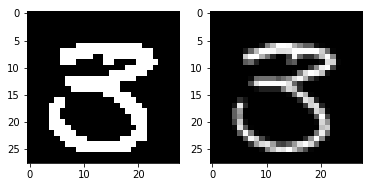

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 7

img_mono = X_train_mono.iloc[i, :].values.astype('float32').reshape(28, 28)
img = X_train.iloc[i, :].values.astype('float32').reshape(28,28)

plt.subplot(1, 2, 1)
plt.imshow(img_mono, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap = 'gray')

In [32]:
try:
    X_train = X_train.values.astype('float32').reshape(X_train.shape[0], 28, 28, 1)
    X_train_mono = X_train_mono.values.astype('float32').reshape(X_train_mono.shape[0], 28, 28, 1)
except:
    print('converted and reshaped')

Preprocessing grayscale image through standardization

In [33]:
meanx = X_train.mean().astype(np.float32)
stdx = X_train.std().astype(np.float32)

def standardization(x):
    return (x - meanx)/stdx

The labels needs to be converted into categorical in order to be usable

In [34]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

y_train.shape

(42000, 10)

Generate a random seed in order to confirm repeatability

In [35]:
seed = 123
np.random.seed(123)

The model uses 3 layers. 
1. Normalization layer
2. Flattening layer
3. Dense layer

In [36]:
#linear model imports
from keras.models import Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [37]:
#defining the model

model = Sequential()
model.add(Lambda(standardization, input_shape = (28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [38]:
from keras.optimizers import RMSprop, Adagrad
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [39]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [40]:
from sklearn.model_selection import train_test_split
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_train, y_train, test_size = 0.10, random_state = 42)
batches = gen.flow(X_train_norm, y_train_norm, batch_size = 64)
val_batches = gen.flow(X_val_norm, y_val_norm, batch_size = 64)


In [41]:
history = model.fit_generator(batches, batches.n, 
                              nb_epoch = 1, 
                              validation_data = val_batches, 
                              nb_val_samples = val_batches.n)

C:\Users\Michael\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\Users\Michael\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  after removing the cwd from sys.path.


Epoch 1/1
37800/37800 [==============================] - 221s 6ms/step - loss: 0.2403 - acc: 0.9342 - val_loss: 0.3272 - val_acc: 0.9102


In [42]:
gen_mono = image.ImageDataGenerator()

In [44]:
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_train_mono, 
                                                                      y_train, 
                                                                      test_size = 0.10, 
                                                                      random_state = 42)

batches_mono = gen_mono.flow(X_train_mono, y_train_mono, batch_size = 64)
val_batches_mono= gen_mono.flow(X_val_mono, y_val_mono, batch_size = 64)

In [45]:
history = model.fit_generator(batches_mono, batches_mono.n, 
                              nb_epoch = 1, 
                              validation_data = val_batches_mono,
                              nb_val_samples = val_batches_mono.n)

Epoch 1/1
    1/37800 [..............................] - ETA: 2:05:04 - loss: 3.0906 - acc: 0.0781

C:\Users\Michael\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
C:\Users\Michael\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  after removing the cwd from sys.path.


37800/37800 [==============================] - 202s 5ms/step - loss: 2.0424 - acc: 0.3635 - val_loss: 1.8485 - val_acc: 0.4692
